In [1]:
import os
from typing import *


os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels')


curPath: str = os.getcwd() + "/src/CausalNexStudy/"

dataPath: str = os.getcwd() + "/src/_data/"


print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/CausalNexStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/_data/ 



In [2]:
import sys
# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within CausalNex folder
sys.path.append(curPath)
sys.path.append(curPath + 'fonts/')

sys.path

['/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/CausalNexStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/CausalNexStudy/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/CausalNexStudy/fonts/']

In [3]:
# Importing

In [4]:

from causalnex.structure import StructureModel
from causalnex.network import BayesianNetwork

import pandas as pd
from pandas.core.frame import DataFrame

from src.utils.DataUtil import *
from src.utils.GraphvizUtil import *


import collections

In [5]:
# ## Step 1: Creating the data

In [6]:

# Creating some names for the random variables (nodes) in the graph, to clarify meaning.

# Create named tuple class with names "Names" and "Objects"
RandomVariable = collections.namedtuple("RandomVariable", ["var", "states"])


ProcessType = RandomVariable(var = "ProcessType", states = ['Accel-Pedal',
                                                            'Door-Mount',
                                                            'Engine-Mount',
                                                            'Engine-Wiring',
                                                            'Oil-Fill',
                                                            'Sun-Roof-Housing'])

ToolType = RandomVariable(var = "ToolType", states = ['Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'])

InjuryType = RandomVariable(var = "InjuryType", states = ['Chemical-Burn',
                                                          'Contact-Contusion',
                                                          'Electrical-Burn',
                                                          'Electrical-Shock',
                                                          'Fall-Gtm'])

#AbsenteeismLevel = RandomVariable(var = "AbsenteeismLevel", states =  ['Absenteeism-00',
#                                                                       'Absenteeism-01',
#                                                                       'Absenteeism-02',
#                                                                       'Absenteeism-03'])
AbsenteeismLevel = RandomVariable(var = "AbsenteeismLevel", states =  ['Low', 'Medium', 'High'])


# Make 30 days to represent 1 month
Time = RandomVariable(var = "Time", states = list(map(lambda day : str(day), range(1, 31))))

#TrainingLevel = RandomVariable(var = "TrainingLevel", states = ['Training-00',
#                                                                'Training-01',
#                                                                'Training-02',
#                                                                'Training-03'])
TrainingLevel = RandomVariable(var = "TrainingLevel", states = ['Low', 'Medium', 'High'])

#ExertionLevel = RandomVariable(var = "ExertionLevel", states = ['Exertion-00',
#                                                                'Exertion-01',
#                                                                'Exertion-02',
#                                                                'Exertion-03'])
ExertionLevel = RandomVariable(var = "ExertionLevel", states = ['Low', 'Medium', 'High'])

#ExperienceLevel = RandomVariable(var = "ExperienceLevel", states = ['Experience-00',
#                                                                    'Experience-01',
#                                                                    'Experience-02',
#                                                                    'Experience-03'])
ExperienceLevel = RandomVariable(var = "ExperienceLevel", states = ['Low', 'Medium', 'High'])

#WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['WorkCapacity-00',
#                                                              'WorkCapacity-01',
#                                                              'WorkCapacity-02',
#                                                              'WorkCapacity-03'])
WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['Low', 'Medium', 'High'])

dataDict = {Time.var : Time.states,
            TrainingLevel.var : TrainingLevel.states,
            ExertionLevel.var : ExertionLevel.states,
            ExperienceLevel.var : ExperienceLevel.states,
            WorkCapacity.var : WorkCapacity. states,
            ProcessType.var : ProcessType.states,
            ToolType.var : ToolType.states,
            InjuryType.var : InjuryType.states,
            AbsenteeismLevel.var : AbsenteeismLevel.states}

dataDict

{'Time': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30'],
 'TrainingLevel': ['Low', 'Medium', 'High'],
 'ExertionLevel': ['Low', 'Medium', 'High'],
 'ExperienceLevel': ['Low', 'Medium', 'High'],
 'WorkCapacity': ['Low', 'Medium', 'High'],
 'ProcessType': ['Accel-Pedal',
  'Door-Mount',
  'Engine-Mount',
  'Engine-Wiring',
  'Oil-Fill',
  'Sun-Roof-Housing'],
 'ToolType': ['Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'],
 'InjuryType': ['Chemical-Burn',
  'Contact-Contusion',
  'Electrical-Burn',
  'Electrical-Shock',
  'Fall-Gtm'],
 'AbsenteeismLevel': ['Low', 'Medium', 'High']}

In [7]:
#data: DataFrame = makeWhiteNoiseDataFrame(dataValues = {Time.var : Time.states,
#                                                        TrainingLevel.var : TrainingLevel.states,
#                                                        ExertionLevel.var : ExertionLevel.states,
#                                                        ExperienceLevel.var : ExperienceLevel.states,
#                                                        WorkCapacity.var : WorkCapacity. states,
#                                                        ProcessType.var : ProcessType.states,
#                                                        ToolType.var : ToolType.states,
#                                                        InjuryType.var : InjuryType.states,
#                                                        AbsenteeismLevel.var : AbsenteeismLevel.states},
#                                          dataPath = dataPath + 'fullRawCombData.csv')

In [8]:
signalDict = {Time.var : Time.states, ProcessType.var : ['Engine-Mount', 'Engine-Wiring', 'Oil-Fill'],
              ToolType.var : ToolType.states,
              InjuryType.var : ['Fall-Gtm', 'Contact-Contusion', 'Chemical-Burn', 'Electrical-Shock'],
              AbsenteeismLevel.var : AbsenteeismLevel.states}


whiteNoiseData: DataFrame = makeWhiteNoiseData(dataDict = dataDict, signalDict = signalDict) #, fileName = dataPath +"whitenoise.csv")

whiteNoiseData

,Time,TrainingLevel,ExertionLevel,ExperienceLevel,WorkCapacity,ProcessType,ToolType,InjuryType,AbsenteeismLevel
0,1,Low,Low,Low,Low,Door-Mount,Forklift,Electrical-Burn,Low
1,1,Low,Low,Low,Low,Door-Mount,Forklift,Electrical-Burn,Medium
2,1,Low,Low,Low,Low,Door-Mount,Forklift,Electrical-Burn,High
3,1,Low,Low,Low,Low,Door-Mount,Front-Right-Door,Electrical-Burn,Low
4,1,Low,Low,Low,Low,Door-Mount,Front-Right-Door,Electrical-Burn,Medium
...,...,...,...,...,...,...,...,...,...
87475,30,High,High,High,High,Sun-Roof-Housing,Oil,Electrical-Burn,Medium
87476,30,High,High,High,High,Sun-Roof-Housing,Oil,Electrical-Burn,High
87477,30,High,High,High,High,Sun-Roof-Housing,Power-Gun,Electrical-Burn,Low
87478,30,High,High,High,High,Sun-Roof-Housing,Power-Gun,Electrical-Burn,Medium


In [9]:
# Reading in the use case data
# NOTE: reading in every column as string type so the Time variable will come out string
usecaseData: DataFrame = pd.read_csv(dataPath + 'WIKI_USECASES_4_5.csv', delimiter = ',', dtype = str)
usecaseData = cleanData(usecaseData)

# Now convert the Time to int:
usecaseData[Time.var] = usecaseData[Time.var].astype(int)

# Quick check that no spaces still remain in the values (like 'High  ' and 'High')
assert len(np.unique(usecaseData[ExertionLevel.var])) == 3

usecaseData

,Time,TrainingLevel,ExertionLevel,ExperienceLevel,WorkCapacity,ProcessType,ToolType,InjuryType,AbsenteeismLevel
0,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
1,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
2,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
3,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,Medium
4,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
...,...,...,...,...,...,...,...,...,...
924,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
925,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
926,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium
927,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium


In [10]:
# Concatenate the two data frames to create the final full data set
# whiteNoiseData['Time'] = whiteNoiseData['Time'].astype(int)

# NOTE: inspected results but ElectricalBurn turns out too high probability (in Injury CPD later on) probabily just because of the frequency of appearances, so the whole 'whitenoisedata' concept cannot be correct. Even using a single state value for  white noise, just using the non-signal values to generate combinations of whtie noise values will STILL bias the results, even if the end ndoe variable (Absenteeism) is still 01,2,3 evenly spread out among that single state value.
#data: DataFrame = pd.concat([usecaseData, whiteNoiseData],
#                                keys=['UsecaseData', 'StubData'],
#                                names=['Type of Data', 'Row ID'])

# To see the data
#data.to_csv(path_or_buf = dataPath + 'WIKI_USECASES_4_5_fulldata.csv' , sep =',')


data = usecaseData



In [11]:
# ## Step 2: Creating the Network Structure

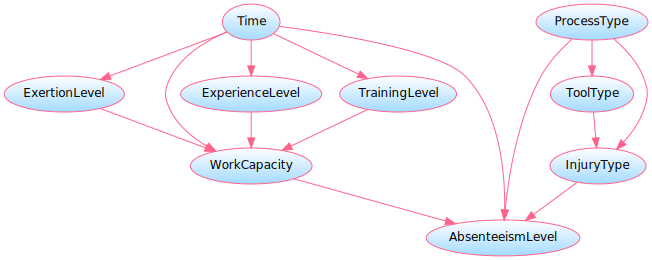

In [12]:


carModel: StructureModel = StructureModel()

carModel.add_edges_from([
    (ExertionLevel.var, WorkCapacity.var),
    (ExperienceLevel.var, WorkCapacity.var),
    (TrainingLevel.var, WorkCapacity.var),
    (WorkCapacity.var, AbsenteeismLevel.var),

    (Time.var, WorkCapacity.var),
    (Time.var, AbsenteeismLevel.var),
    (Time.var, ExertionLevel.var),
    (Time.var, ExperienceLevel.var),
    (Time.var, TrainingLevel.var),

    (ProcessType.var, ToolType.var),
    (ToolType.var, InjuryType.var),
    (ProcessType.var, InjuryType.var),
    (ProcessType.var, AbsenteeismLevel.var),
    (InjuryType.var, AbsenteeismLevel.var)
])


structToGraph(weightedGraph = carModel)

Now visualize:

/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: node 'ExertionLevel', graph '%3' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


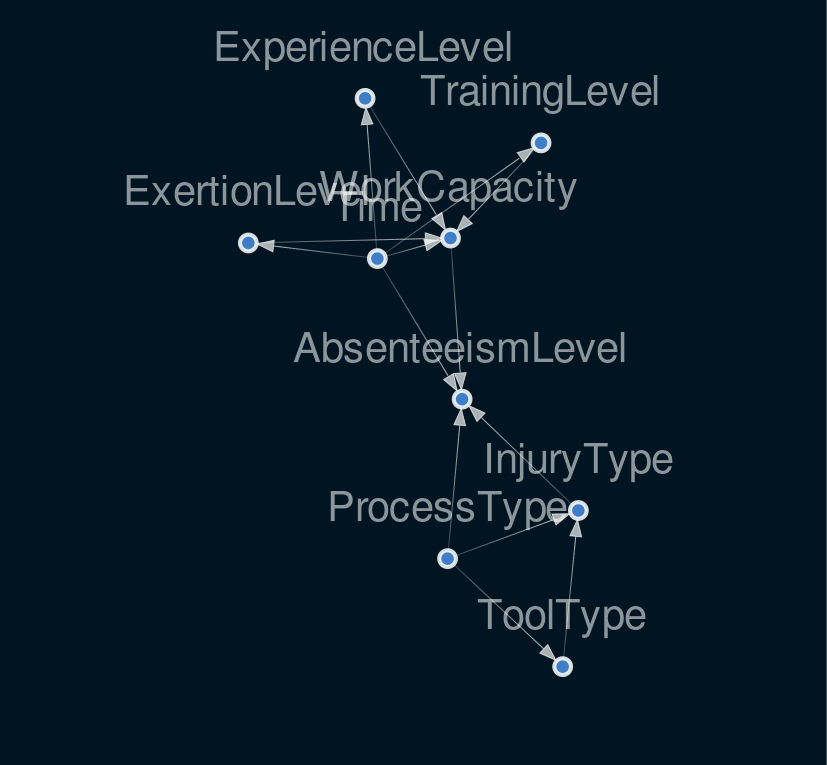

In [13]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

# Now visualize it:
viz = plot_structure(
    carModel,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)

filename_demo = curPath + "demo.png"


viz.draw(filename_demo)

Image(filename_demo)

In [14]:
# ## Step 3: Create the Bayesian Model and Fit CPDs

In [15]:
# Checking the structure is acyclic before passing it to bayesian network:
import networkx as nx

assert nx.is_directed_acyclic_graph(carModel)

# Now fit bayesian model
bayesNet: BayesianNetwork = BayesianNetwork(carModel)

In [16]:
# Fit node states

In [17]:
bayesNet.fit_node_states(df = data)
bayesNet.node_states

{'Time': {1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30},
 'TrainingLevel': {'High', 'Low', 'Medium'},
 'ExertionLevel': {'High', 'Low', 'Medium'},
 'ExperienceLevel': {'High', 'Low', 'Medium'},
 'WorkCapacity': {'High', 'Low', 'Medium'},
 'ProcessType': {'Engine-Mount', 'Engine-Wiring', 'Oil-Fill'},
 'ToolType': {'Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'},
 'InjuryType': {'Chemical-Burn',
  'Contact-Contusion',
  'Electrical-Shock',
  'Fall-Gtm'},
 'AbsenteeismLevel': {'High', 'Low', 'Medium'}}

Fitting the conditional probability distributions

In [18]:
bayesNet.fit_cpds(data, method="BayesianEstimator", bayes_prior="K2")

Because `Time` has no incoming nodes, only outgoing nodes, its conditional distribution is also its *fully* marginal distribution - it is not conditional on any other variable.

In [19]:
bayesNet.cpds[Time.var]

,
Time,
1,0.033333
2,0.033333
3,0.033333
4,0.033333
5,0.033333
6,0.033333
7,0.033333
8,0.033333
9,0.033333


In [20]:
# $\color{green}{\text{SUCCESS:}}$
#
# 1. as **time** increases, it is more likely that **exertion-level** rises also.

In [21]:
bayesNet.cpds[ExertionLevel.var]

Time,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
ExertionLevel,,,,,,,,,,,,,,,,,,,,,
High,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,...,0.030303,0.939394,0.939394,0.939394,0.939394,0.030303,0.939394,0.939394,0.939394,0.939394
Low,0.939394,0.939394,0.939394,0.030303,0.030303,0.939394,0.939394,0.939394,0.939394,0.939394,...,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303
Medium,0.030303,0.030303,0.030303,0.939394,0.939394,0.030303,0.030303,0.030303,0.030303,0.030303,...,0.939394,0.030303,0.030303,0.030303,0.030303,0.939394,0.030303,0.030303,0.030303,0.030303


In [22]:
# $\color{green}{\text{SUCCESS:}}$
#
# 1. as **time** increases, it is more likely that **experience-level** rises also.

In [23]:
bayesNet.cpds[ExperienceLevel.var]

Time,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
ExperienceLevel,,,,,,,,,,,,,,,,,,,,,
High,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,...,0.030303,0.939394,0.939394,0.939394,0.939394,0.030303,0.939394,0.939394,0.939394,0.939394
Low,0.939394,0.939394,0.939394,0.030303,0.030303,0.939394,0.939394,0.939394,0.939394,0.939394,...,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303
Medium,0.030303,0.030303,0.030303,0.939394,0.939394,0.030303,0.030303,0.030303,0.030303,0.030303,...,0.939394,0.030303,0.030303,0.030303,0.030303,0.939394,0.030303,0.030303,0.030303,0.030303


In [24]:
# $\color{green}{\text{SUCCESS:}}$
#
# 1. as **time** increases, it is more likely that **training-level** rises also.

In [25]:
bayesNet.cpds[TrainingLevel.var]

Time,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
TrainingLevel,,,,,,,,,,,,,,,,,,,,,
High,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,...,0.030303,0.939394,0.939394,0.939394,0.939394,0.030303,0.939394,0.939394,0.939394,0.939394
Low,0.939394,0.939394,0.939394,0.030303,0.030303,0.939394,0.939394,0.939394,0.939394,0.939394,...,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303
Medium,0.030303,0.030303,0.030303,0.939394,0.939394,0.030303,0.030303,0.030303,0.030303,0.030303,...,0.939394,0.030303,0.030303,0.030303,0.030303,0.939394,0.030303,0.030303,0.030303,0.030303


In [26]:
# $\color{red}{\text{TODO: why isn't work capacity reflecting HIGH --> LOW??}}$
#
# * (a) $\color{red}{\text{X}}$ As **time** increases, the **exertion-level** rises and **experience-level** rises and **training-level** rises which in turn might raise **work-capacity**.
# * (b)  $\color{red}{\text{X}}$  As **time** increases more, the **exertion-level**, **experience-level**, **training-level** may all rise but at a specific point in time, the **exertion-level** may be high enough to lower **work-capacity** more than in Scenario 1, despite the higher levels of **experience-level** and **training-level**.

In [27]:
bayesNet.cpds[WorkCapacity.var]

ExertionLevel        High                                                    \
ExperienceLevel      High                                                     
Time                   1                             2                        
TrainingLevel        High       Low    Medium      High       Low    Medium   
WorkCapacity                                                                  
High             0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Low              0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Medium           0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

ExertionLevel                                            ...    Medium  \
ExperienceLevel                                          ...    Medium   
Time                   3                             4   ...        27   
TrainingLevel        High       Low    Medium      High  ...    Medium   
WorkCapacity                                             ...             
High             0.333333  0.333333  0.333333  0.333333  ...  0.333333   
Low              0.333333  0.333333  0.333333  0.333333  ...  0.333333   
Medium           0.333333  0.333333  0.333333  0.333333  ...  0.333333   

ExertionLevel                                                                \
ExperienceLevel                                                               
Time                   28                            29                       
TrainingLevel        High       Low    Medium      High       Low    Medium   
WorkCapacity                                                                  
High             0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Low              0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Medium           0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

ExertionLevel                                  
ExperienceLevel                                
Time                   30                      
TrainingLevel        High       Low    Medium  
WorkCapacity                                   
High             0.333333  0.333333  0.333333  
Low              0.333333  0.333333  0.333333  
Medium           0.333333  0.333333  0.333333  

[3 rows x 810 columns]

In [28]:
# $\color{green}{\text{SUCCESS: }}$
#
# * (a) Given **process-type** = `Engine-Mount` and **tool-type** = `Forklift` the most likely **injury-type** = `Contact-Contusion` or even `Fall-Gtm` rather than things like `Chemical-Burn`. $\color{red}{\text{Actually, Chemical-Burn turns out high probablility ...? todo}}$
# * (b) Given **process-type** = `Engine-Wiring` and **tool-type** = `Power-Gun` the most likely **injury-type** = `Electrical-Shock` than things like `Contact-Contusion`.
# * (e) Given **process-type** = `Oil-Fill` and **tool-type** = `Oil`, the most likely **injury-type** = either `Chemical-Burn` or `Electrical-Shock`. (NOTE: focused on `Chemical-Burn` in data set so that is why the other option does not have high probability)

In [29]:
bayesNet.cpds[InjuryType.var]

ProcessType       Engine-Mount                                  Engine-Wiring  \
ToolType              Forklift Front-Right-Door   Oil Power-Gun      Forklift   
InjuryType                                                                      
Chemical-Burn         0.496711             0.25  0.25      0.25          0.25   
Contact-Contusion     0.299342             0.25  0.25      0.25          0.25   
Electrical-Shock      0.003289             0.25  0.25      0.25          0.25   
Fall-Gtm              0.200658             0.25  0.25      0.25          0.25   

ProcessType                                        Oil-Fill                   \
ToolType          Front-Right-Door   Oil Power-Gun Forklift Front-Right-Door   
InjuryType                                                                     
Chemical-Burn                 0.25  0.25  0.002538     0.25         0.968085   
Contact-Contusion             0.25  0.25  0.002538     0.25         0.010638   
Electrical-Shock              0.25  0.25  0.535533     0.25         0.010638   
Fall-Gtm                      0.25  0.25  0.459391     0.25         0.010638   

ProcessType                            
ToolType                Oil Power-Gun  
InjuryType                             
Chemical-Burn      0.975806      0.25  
Contact-Contusion  0.008065      0.25  
Electrical-Shock   0.008065      0.25  
Fall-Gtm           0.008065      0.25

In [30]:
# * $\color{blue}{\text{DEBUG}}:$ case (a): the **injury-type** = `Chemical-Burn` came out with probability = $0.496711$ (so basically the highest probability in the CPD) when **tool-type** = `Forklift` and **process-type** = `Engine-Mount` because there was higher frequency of **injury-type** = `Chemical-Burn` in the data, when conditional on these variable states. Just see the snapshot of the data below for the `Forklift` section:

In [31]:

usecaseData[(usecaseData.ProcessType == 'Engine-Mount') &
            (usecaseData.Time == 1) &
            (usecaseData.ToolType == 'Forklift')]

,Time,TrainingLevel,ExertionLevel,ExperienceLevel,WorkCapacity,ProcessType,ToolType,InjuryType,AbsenteeismLevel
0,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
1,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
2,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
3,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,Medium
4,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
5,1,Low,Low,Low,High,Engine-Mount,Forklift,Chemical-Burn,Low
6,1,Low,Low,Low,High,Engine-Mount,Forklift,Chemical-Burn,Low
7,1,Low,Low,Low,High,Engine-Mount,Forklift,Chemical-Burn,Low
8,1,Low,Low,Low,High,Engine-Mount,Forklift,Chemical-Burn,Low
9,1,Low,Low,Low,High,Engine-Mount,Forklift,Chemical-Burn,Low


In [32]:
# * $\color{blue}{\text{DEBUG}}:$ case (b): there was even probability (both high compared to rest) for values `Electrical-Shock` and `Fall-Gtm` when **process-type** = `Engine-Wiring` and **tool-type** = `Power-Gun`, which reflects what was in the data (but not what was specified in the use case)

In [33]:

usecaseData[(usecaseData.ProcessType == 'Engine-Wiring') &
            (usecaseData.Time == 1) &
            (usecaseData.ToolType == 'Power-Gun')]

,Time,TrainingLevel,ExertionLevel,ExperienceLevel,WorkCapacity,ProcessType,ToolType,InjuryType,AbsenteeismLevel
10,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
11,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
12,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
13,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
14,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
15,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
16,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Electrical-Shock,High
17,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Fall-Gtm,Low
18,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Fall-Gtm,Low
19,1,Low,Low,Low,High,Engine-Wiring,Power-Gun,Fall-Gtm,Low


In [34]:
# * **work-capacity** = `High` when **absenteeism-level** = `Low` with probability $0.750$
# * $\color{red}{\text{TODO}}:$ why is it true that there are equally likely probabilities everywhere else?

In [35]:
bayesNet.cpds[AbsenteeismLevel.var]



InjuryType       Chemical-Burn                                                 \
ProcessType       Engine-Mount                                                  
Time                        1                             2                     
WorkCapacity              High       Low    Medium      High       Low Medium   
AbsenteeismLevel                                                                
High                     0.125  0.333333  0.333333  0.333333  0.333333  0.125   
Low                      0.750  0.333333  0.333333  0.333333  0.333333  0.750   
Medium                   0.125  0.333333  0.333333  0.333333  0.333333  0.125   

InjuryType                                          ...  Fall-Gtm            \
ProcessType                                         ...  Oil-Fill             
Time                 3                          4   ...        27        28   
WorkCapacity       High       Low    Medium   High  ...    Medium      High   
AbsenteeismLevel                                    ...                       
High              0.125  0.333333  0.333333  0.125  ...  0.333333  0.333333   
Low               0.750  0.333333  0.333333  0.750  ...  0.333333  0.333333   
Medium            0.125  0.333333  0.333333  0.125  ...  0.333333  0.333333   

InjuryType                                                                    \
ProcessType                                                                    
Time                                        29                            30   
WorkCapacity           Low    Medium      High       Low    Medium      High   
AbsenteeismLevel                                                               
High              0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Low               0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Medium            0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

InjuryType                            
ProcessType                           
Time                                  
WorkCapacity           Low    Medium  
AbsenteeismLevel                      
High              0.333333  0.333333  
Low               0.333333  0.333333  
Medium            0.333333  0.333333  

[3 rows x 1080 columns]

In [36]:
# ## Step 4: Inference (querying marginals)

In [37]:
from causalnex.inference import InferenceEngine


eng = InferenceEngine(bn = bayesNet)

# querying the baseline marginals as learned from the data
marginalDist: Dict[Variable, Dict[State, Probability]] = eng.query()
marginalDist

{'ExertionLevel': {'High': 0.3636363636363737,
  'Low': 0.30303030303031214,
  'Medium': 0.3333333333333351},
 'WorkCapacity': {'High': 0.3333333333333342,
  'Low': 0.33333333333333426,
  'Medium': 0.3333333333333342},
 'AbsenteeismLevel': {'High': 0.4181546608039674,
  'Low': 0.3728072461357549,
  'Medium': 0.20903809306028004},
 'ExperienceLevel': {'High': 0.3636363636363737,
  'Low': 0.30303030303031214,
  'Medium': 0.3333333333333351},
 'TrainingLevel': {'High': 0.36363636363637725,
  'Low': 0.3030303030303117,
  'Medium': 0.33333333333333404},
 'Time': {1: 0.033333333333333375,
  2: 0.033333333333333375,
  3: 0.033333333333333375,
  4: 0.03333333333333336,
  5: 0.03333333333333337,
  6: 0.033333333333333375,
  7: 0.033333333333333375,
  8: 0.033333333333333375,
  9: 0.033333333333333375,
  10: 0.033333333333333375,
  11: 0.03333333333333336,
  12: 0.03333333333333336,
  13: 0.033333333333333375,
  14: 0.03333333333333337,
  15: 0.033333333333333375,
  16: 0.033333333333333375,
  1

In [38]:
# Checking marginal distribution of **work-capacity**:

In [39]:
eng.query()[WorkCapacity.var]

{'High': 0.3333333333333342,
 'Low': 0.33333333333333426,
 'Medium': 0.3333333333333342}

In [40]:
# Biasing so that lower work capacity probability gets higher:

In [41]:
# NOTE: in the data, in TIME + 30, when exertion, training, experience are all HIGH, the work-capacity = LOW
eng.query({Time.var : 30, ExertionLevel.var : 'High', TrainingLevel.var : 'High', ExperienceLevel.var : 'High'})[WorkCapacity.var]

{'High': 0.0303030303030303,
 'Low': 0.9393939393939394,
 'Medium': 0.0303030303030303}

In [42]:
# Different than data: at time = 30, in data all these exertion, experience, training are High, so testing what happens to workcapacity when they are set to Medium:
eng.query({Time.var : 30, ExertionLevel.var : 'Medium', TrainingLevel.var : 'Medium', ExperienceLevel.var : 'Medium'})[WorkCapacity.var]

{'High': 0.3333333333333333,
 'Low': 0.3333333333333334,
 'Medium': 0.3333333333333333}

In [43]:
# Different than data: at time = 30, in data all these exertion, experience, training are High, so testing what happens to workcapacity when they are set to Low:
eng.query({Time.var : 30, ExertionLevel.var : 'Low', TrainingLevel.var : 'Low', ExperienceLevel.var : 'Low'})[WorkCapacity.var]

{'High': 0.3333333333333333,
 'Low': 0.3333333333333334,
 'Medium': 0.3333333333333333}

In [44]:
# NOTE: in the data set, exertion, training, experience are all MEDIUM during Time = 5 so this is why the inference also assigns high probability to Medium
eng.query({Time.var : 5, ExertionLevel.var : 'Medium', TrainingLevel.var : 'Medium', ExperienceLevel.var : 'Medium'})[WorkCapacity.var]

{'High': 0.0303030303030303,
 'Low': 0.0303030303030303,
 'Medium': 0.9393939393939394}

In [45]:
# NOTE: in the data, the work capacity  = Medium when all other vars here are medium, during time = 26 so that is why there is such high probability of Medium for work capacity, assuming these states.
eng.query({Time.var : 26, ExertionLevel.var : 'Medium', TrainingLevel.var : 'Medium', ExperienceLevel.var : 'Medium'})[WorkCapacity.var]

{'High': 0.0303030303030303,
 'Low': 0.0303030303030303,
 'Medium': 0.9393939393939394}

In [46]:
# NOTE: in the data set, exertion, training, experience are all LOW during Time = 2 so this is why the inference also assigns high probability to LOW

eng.query({Time.var : 2, ExertionLevel.var : 'Low', TrainingLevel.var : 'Low', ExperienceLevel.var : 'Low'})[WorkCapacity.var]

{'High': 0.0303030303030303,
 'Low': 0.0303030303030303,
 'Medium': 0.9393939393939394}

In [47]:
# ## Step 5: Reasoning via Active Trails
# ### 1/ Reasoning via Active Trails along Causal Chains in the Car Model

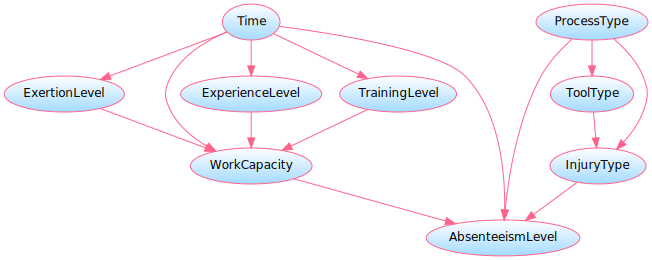

In [48]:
structToGraph(carModel)

In [49]:
# #### Testing conditional independence:
# $$
# \color{DodgerBlue}{\text{ExertionLevel (observed)}: \;\;\;\;\;\;\;  \text{Time} \; \bot \; \text{WorkCapacity} \; | \; \text{ExertionLevel}}
# $$
# Given that **ExertionLevel**'s state is unobserved, we can make the following equivalent statements:
# * there IS active trail between **Time** and **WorkCapacity**.
# * **Time** and **WorkCapacity** are dependent.
# * the probability of **Time** can influence probability of **WorkCapacity** (and vice versa).

In [50]:
eng.query({Time.var : 30, ExertionLevel.var : 'High'})[WorkCapacity.var]

{'High': 0.06592091716058655,
 'Low': 0.8681581656788268,
 'Medium': 0.06592091716058655}

In [51]:
eng.query({Time.var : 5, ExertionLevel.var : 'High'})[WorkCapacity.var]

{'High': 0.33333333333333337,
 'Low': 0.33333333333333337,
 'Medium': 0.33333333333333337}

In [52]:
eng.query({Time.var : 23, ExertionLevel.var : 'High'})[WorkCapacity.var]

{'High': 0.06592091716058657,
 'Low': 0.8681581656788269,
 'Medium': 0.06592091716058657}

In [53]:
eng.query({Time.var : 11, ExertionLevel.var : 'High'})[WorkCapacity.var]

{'High': 0.33333333333333337,
 'Low': 0.33333333333333337,
 'Medium': 0.33333333333333337}

In [54]:
# $\color{green}{\text{SUCCESS}}$ the probabilities ARE different, signifying an active trail between Time and WorkCapacity.

In [55]:
# #### Testing the causal chain:
# $$
# \color{SeaGreen}{\text{ExertionLevel (unobserved)}: \;\;\;\;\;\;\; \text{Time} \rightarrow \text{ExertionLevel} \rightarrow \text{WorkCapacity}}
# $$
# Given that **ExertionLevel**'s state is unobserved, we can make the following equivalent statements:
# * there is NO active trail between **Time** and **WorkCapacity**.
# * **Time** and **WorkCapacity** are locally independent.
# * the probability of **Time** won't influence probability of **WorkCapacity** (and vice versa).

In [56]:
eng.query({Time.var : 30})[WorkCapacity.var]

{'High': 0.0821277302619652,
 'Low': 0.8357445394760696,
 'Medium': 0.0821277302619652}

In [57]:
eng.query({Time.var : 5})[WorkCapacity.var]

{'High': 0.08212773026196515,
 'Low': 0.08212773026196515,
 'Medium': 0.8357445394760697}

In [58]:
eng.query({Time.var : 23})[WorkCapacity.var]

{'High': 0.0821277302619652,
 'Low': 0.8357445394760696,
 'Medium': 0.0821277302619652}

In [59]:
eng.query({Time.var : 11})[WorkCapacity.var]

{'High': 0.8357445394760697,
 'Low': 0.08212773026196515,
 'Medium': 0.08212773026196515}

In [60]:
# $\color{red}{\text{TODO Problem!: }}$ Not supposed to be dependent probabilities (different distributions) when Exertion is not observed, so why are the probabilities different?






In [61]:
# ### 4/ Reasoning via Active Trails along Common Effect Structures in the Car Model

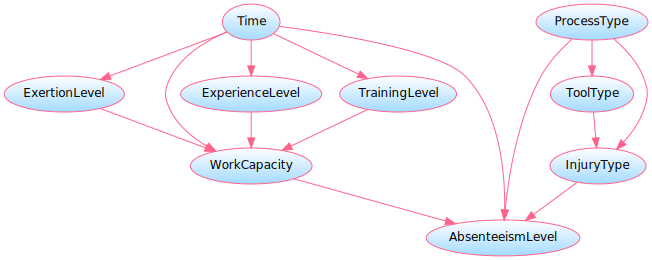

In [62]:
structToGraph(carModel)

In [63]:
# #### Testing marginal independence:
# $$
# \color{DodgerBlue}{\text{AbsenteeismLevel (unobserved)}: \;\;\;\;\;\;\;  \text{InjuryType} \; \bot \; \text{ProcessType} \; | \; \text{AbsenteeismLevel}}
# $$
# Given that **AbsenteeismLevel**'s state is unobserved, we can make the following equivalent statements:
# * there is NO active trail between **InjuryType** and **ProcessType**.
# * **InjuryType** and **ProcessType** are locally independent.
# * the probability of **InjuryType** cannot influence probability of **ProcessType** (and vice versa).

In [64]:
eng.query({InjuryType.var : 'Contact-Contusion'})[ProcessType.var]

{'Engine-Mount': 0.9560148009768331,
 'Engine-Wiring': 0.018376474359398213,
 'Oil-Fill': 0.02560872466376869}

In [65]:
eng.query({InjuryType.var : 'Fall-Gtm'})[ProcessType.var]

{'Engine-Mount': 0.2502332132630372,
 'Engine-Wiring': 0.739807684055578,
 'Oil-Fill': 0.009959102681384797}

In [66]:
eng.query({InjuryType.var : 'Electrical-Shock'})[ProcessType.var]

{'Engine-Mount': 0.008101336853252677,
 'Engine-Wiring': 0.980568600707957,
 'Oil-Fill': 0.011330062438790254}

In [67]:
eng.query({InjuryType.var : 'Chemical-Burn'})[ProcessType.var]

{'Engine-Mount': 0.41994521035105337,
 'Engine-Wiring': 0.004880693904063434,
 'Oil-Fill': 0.5751740957448832}

In [68]:
# $\color{red}{\text{TODO Problem!: }}$ Not supposed to be dependent probabilities (different distributions)



In [69]:
# #### Testing the inter-causal chain:
# $$
# \color{SeaGreen}{\text{AbsenteeismLevel (observed)}: \;\;\;\;\;\;\; \text{InjuryType} \Longrightarrow \text{AbsenteeismLevel} \Longleftarrow \text{ProcessType}}
# $$
# Given that **AbsenteeismLevel**'s state is observed, we can make the following equivalent statements:
# * there IS active trail between **InjuryType** and **ProcessType**.
# * **InjuryType** and **ProcessType** are dependent.
# * the probability of **InjuryType** can influence probability of **ProcessType** (and vice versa).

In [70]:
# Arbitrarily setting absentee = Medium for all of them (to compare):
eng.query({InjuryType.var : 'Contact-Contusion', AbsenteeismLevel.var : 'Medium'})[ProcessType.var]

{'Engine-Mount': 0.9560148009768333,
 'Engine-Wiring': 0.018376474359398143,
 'Oil-Fill': 0.025608724663768654}

In [71]:
eng.query({InjuryType.var : 'Fall-Gtm', AbsenteeismLevel.var : 'Medium'})[ProcessType.var]

{'Engine-Mount': 0.33041643062738724,
 'Engine-Wiring': 0.6498294847074734,
 'Oil-Fill': 0.01975408466513944}

In [72]:
eng.query({InjuryType.var : 'Electrical-Shock', AbsenteeismLevel.var : 'Medium'})[ProcessType.var]

{'Engine-Mount': 0.019001762430940164,
 'Engine-Wiring': 0.9544234686525974,
 'Oil-Fill': 0.026574768916462373}

In [73]:
eng.query({InjuryType.var : 'Chemical-Burn', AbsenteeismLevel.var : 'Medium'})[ProcessType.var]

{'Engine-Mount': 0.273815874250194,
 'Engine-Wiring': 0.006662373771791979,
 'Oil-Fill': 0.719521751978014}